In [85]:
%reload_ext autoreload
%autoreload 2
import numpy as np
from funcs import m0_dgp, m1_dgp
from estimators import estimate_iv_slope_nocons, estimate_ols_slope_nocons
from simulate_data import simulate_data
import matplotlib.pyplot as plt

In [86]:
N = 10000  
supp_z = np.array([0,1,2])
f_z = np.array([0.5,0.4,0.1])
prop_z = np.array([0.35,0.6,0.7])

In [87]:
data = simulate_data(N=1000, supp_z=supp_z, f_z=f_z, prop_z=prop_z)
y = data[:, 0]
d = data[:, 1]
z = data[:, 2]

In [88]:
iv = estimate_iv_slope_nocons(y, z, d)
ols = estimate_ols_slope_nocons(y, d)
iv, ols #expect 0.074 and 0.253

(0.0675335989154991, 0.2563710765271)

In [89]:
# Draw 1000 observations from the DGP and compute iv, ols
reps = 10000
N = 1000

iv = np.zeros(reps)
ols = np.zeros(reps)
for i in range(reps):
    data = simulate_data(N, supp_z, f_z, prop_z)
    y = data[:, 0]
    d = data[:, 1]
    z = data[:, 2]
    iv[i] = estimate_iv_slope_nocons(y, z, d)
    ols[i] = estimate_ols_slope_nocons(y, d)

In [90]:
np.mean(iv), np.mean(ols)

(0.07123815414965877, 0.2530642064674163)

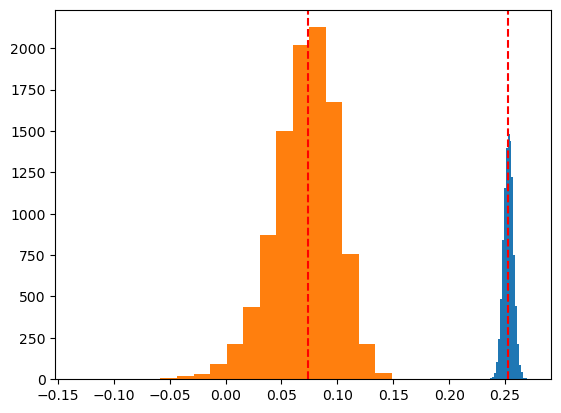

In [93]:
# Histogram of iv and ols
plt.hist(ols, bins=20)
plt.hist(iv, bins=20)

# Put line at 0.074 and 0.253
plt.axvline(x=0.074, color='r', linestyle='--')
plt.axvline(x=0.253, color='r', linestyle='--')